# Walmart Store Sales Forecasting
We are provided with historical sales data for 45 Walmart stores located in different regions. Each store contains many departments, and participants must project the sales for each department in each store.

Project Proposal: https://goo.gl/dtSaU8

Data: https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt

# Stores
Loading store information, segmenting by type. Visual EDA.

In [2]:
store = pd.read_csv(r'C:\Users\Cristino\Desktop\springboard\data\stores.csv')
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [3]:
type_a = store[store.Type == 'A']
type_b = store[store.Type == 'B']
type_c = store[store.Type == 'C']

In [4]:
type_a.describe()

,Store,Size
count,22.000000,22.000000
mean,22.227273,177247.727273
std,13.078269,49392.621098
min,1.000000,39690.000000
25%,11.500000,155840.750000
50%,25.000000,202406.000000
75%,32.750000,203819.000000
max,41.000000,219622.000000


In [5]:
type_b.describe()

,Store,Size
count,17.000000,17.000000
mean,18.352941,101190.705882
std,11.028039,32371.137916
min,3.000000,34875.000000
25%,10.000000,93188.000000
50%,17.000000,114533.000000
75%,23.000000,123737.000000
max,45.000000,140167.000000


In [6]:
type_c.describe()

,Store,Size
count,6.000000,6.000000
mean,39.000000,40541.666667
std,5.215362,1304.145033
min,30.000000,39690.000000
25%,37.250000,39745.000000
50%,40.000000,39910.000000
75%,42.750000,40774.000000
max,44.000000,42988.000000


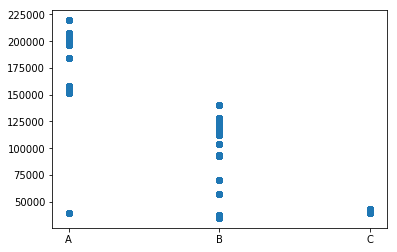

In [32]:
plt.scatter(df['Type'], df['Size'])

noting outlier in Type A

In [8]:
store[store.Size < 50000][store.Type == 'A']

C:\Users\Cristino\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Store,Type,Size
32,33,A,39690
35,36,A,39910


# Sales Data
Loading, cleaning, and merging sales data with features and type / size.

In [9]:
train = pd.read_csv(r'C:\Users\Cristino\Desktop\springboard\data\train.csv',parse_dates= True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [10]:
dp = lambda x: pd.datetime.strptime(x, '%m/%d/%Y')
train_p = pd.read_csv(r'C:\Users\Cristino\Desktop\springboard\data\train.csv', parse_dates = ['Date'], date_parser= dp)

In [11]:
train_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [12]:
features = pd.read_csv(r'C:\Users\Cristino\Desktop\springboard\data\features.csv', parse_dates=True)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 711.9+ KB


In [13]:
dp0 = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
features_p = pd.read_csv(r'C:\Users\Cristino\Desktop\springboard\data\features.csv',parse_dates= ['Date'], date_parser= dp0)
features_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null datetime64[ns]
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 711.9 KB


In [14]:
df = pd.merge(features_p,train_p, on = ['Date','Store'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 15 columns):
Store           421570 non-null int64
Date            421570 non-null datetime64[ns]
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
IsHoliday_x     421570 non-null bool
Dept            421570 non-null int64
Weekly_Sales    421570 non-null float64
IsHoliday_y     421570 non-null bool
dtypes: bool(2), datetime64[ns](1), float64(10), int64(2)
memory usage: 45.8 MB


In [15]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,False
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,False
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,False
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,False
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,False


Adding store.csv information: Type and Size

In [16]:
store = pd.read_csv(r'C:\Users\Cristino\Desktop\springboard\data\stores.csv')
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [17]:
df = pd.merge(df, store, on = 'Store')

In [18]:
df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,Size
count,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,44.260317,15981.258123,136727.915739
std,12.785297,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,30.492054,22711.183519,60980.583328
min,1.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,1.000000,-4988.940000,34875.000000
25%,11.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,18.000000,2079.650000,93638.000000
50%,22.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,37.000000,7612.030000,140167.000000
75%,33.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,74.000000,20205.852500,202505.000000
max,45.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,99.000000,693099.360000,219622.000000


In [19]:
df.Weekly_Sales.describe()

count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

Getting a sense of when each type of Markdown occurs.

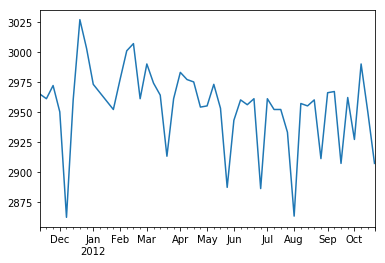

In [20]:
df[df['MarkDown1'].notnull()]['Date'].value_counts().sort_index().plot()

In [21]:
df[df['MarkDown1'].notnull()]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y,Type,Size
6587,1,2011-11-11,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,1,18689.54,False,A,151315
6588,1,2011-11-11,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,2,44936.47,False,A,151315
6589,1,2011-11-11,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,3,9959.64,False,A,151315
6590,1,2011-11-11,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,4,36826.52,False,A,151315
6591,1,2011-11-11,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,5,31002.65,False,A,151315
6592,1,2011-11-11,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,6,3527.62,False,A,151315
6593,1,2011-11-11,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,7,25942.35,False,A,151315
6594,1,2011-11-11,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,8,34003.52,False,A,151315
6595,1,2011-11-11,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,9,37670.13,False,A,151315
6596,1,2011-11-11,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,10,32346.54,False,A,151315


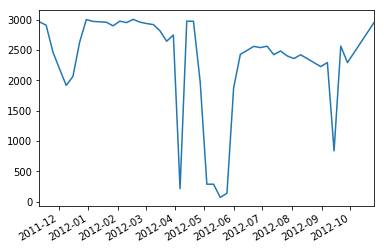

In [22]:
df[df['MarkDown2'].notnull()]['Date'].value_counts().sort_index().plot()

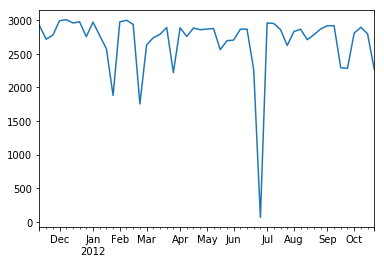

In [23]:
df[df['MarkDown3'].notnull()]['Date'].value_counts().sort_index().plot()

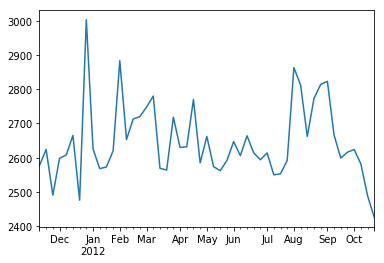

In [24]:
df[df['MarkDown4'].notnull()]['Date'].value_counts().sort_index().plot()

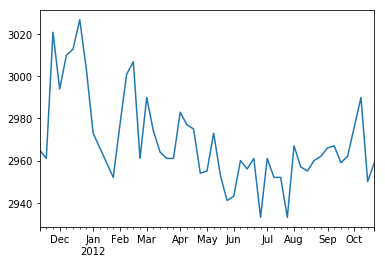

In [25]:
df[df['MarkDown5'].notnull()]['Date'].value_counts().sort_index().plot()

In [26]:
df.loc[df['IsHoliday_x'] == True]['Date'].value_counts()

2011-11-25    3021
2011-12-30    3003
2012-02-10    3001
2012-09-07    2966
2011-09-09    2958
2010-02-12    2956
2010-12-31    2943
2010-11-26    2938
2011-02-11    2938
2010-09-10    2937
Name: Date, dtype: int64

In [27]:
df.loc[df['IsHoliday_y'] == True]['Date'].value_counts()

2011-11-25    3021
2011-12-30    3003
2012-02-10    3001
2012-09-07    2966
2011-09-09    2958
2010-02-12    2956
2010-12-31    2943
2010-11-26    2938
2011-02-11    2938
2010-09-10    2937
Name: Date, dtype: int64

In [28]:
df.drop('IsHoliday_x', axis = 1)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,IsHoliday_y,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1,24924.50,False,A,151315
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2,50605.27,False,A,151315
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,3,13740.12,False,A,151315
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,4,39954.04,False,A,151315
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,32229.38,False,A,151315
5,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,6,5749.03,False,A,151315
6,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,7,21084.08,False,A,151315
7,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,8,40129.01,False,A,151315
8,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,9,16930.99,False,A,151315
9,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,10,30721.50,False,A,151315


In [29]:
df.rename(columns = {'IsHoliday_y':'IsHoliday'}, inplace = True)
df.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday_x', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size'],
      dtype='object')

Each type of Markdown do not seem to be directly related to specific holidays.

## Exploring Weekly Sales Figures

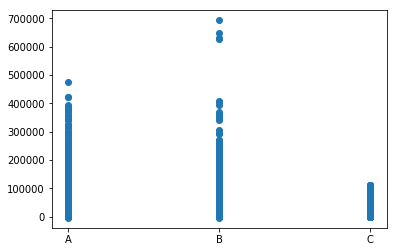

In [30]:
plt.scatter(df['Type'], df['Weekly_Sales'])

C:\Users\Cristino\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


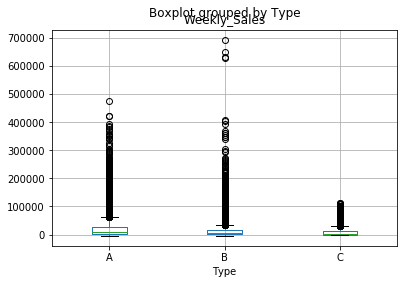

In [33]:
df.boxplot(column='Weekly_Sales', by = 'Type')

Large number of outliers. Need to look at data with Markdown / holiday events removed to see regular week sales trends.

In [ ]:
df[df.Type == 'B'][df['Weekly_Sales'] > 500000]

In [ ]:
plt.scatter(df['Size'], df['Weekly_Sales'])

In [ ]:
df[df['Weekly_Sales'] > 500000]

Type A stores are has the largest size but not the largest weekly sales figures. Investigating outliers in Type B reveals all record numbers were generated by 2 stores (10 and 35) during thanksgiving sales (Nov 25-26, 2010-11) at department 72.